## Detect tabel cell input image has text or not

- gray => Blur image 
- remove lines
- thresh binary otsu
- dilect => contours => make conected component
- detemine has text or not:
    - by w/h ratio?
    - by number of black pixels?

In [2]:
import cv2
import numpy
import matplotlib.pyplot as plt

In [74]:
filename=r"D:\ImageData\table-cell\1feb5942-b32a-11ed-b749-0242ac120003.jpg"
filename=r"D:\ImageData\table-cell2\1_146_0_1_1_0.jpg"
src=cv2.imread(filename)


3 1
9 24
Src shape (71, 96, 3)
Image containt text at position: (47, 27) (56, 51)


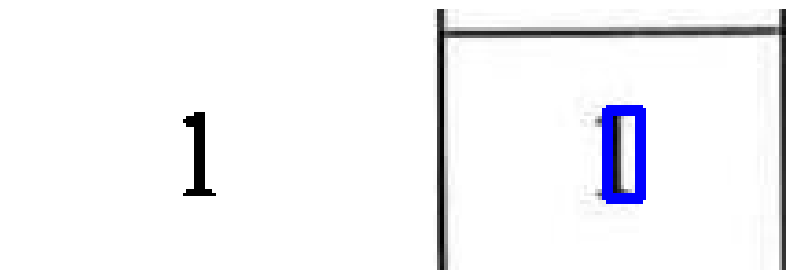

In [83]:
gray=cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)

blur=cv2.GaussianBlur(gray,(5,5),0)

ret,thresh=cv2.threshold(blur,40,200,cv2.THRESH_OTSU+cv2.THRESH_BINARY_INV)

lineRemoved=gray.copy()
# Remove horizontal lines
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,1))
remove_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts,hierachy = cv2.findContours(remove_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(lineRemoved, cnts, -1, (255,255,255), 5)

# Remove vertical lines
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,40))
remove_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
cnts,hierachy = cv2.findContours(remove_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(lineRemoved, cnts, -1, (255,255,255), 5)


ret,lineRemovedThresh=cv2.threshold(lineRemoved,40,200,cv2.THRESH_OTSU+cv2.THRESH_BINARY)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(10,3))
dilate=cv2.morphologyEx(lineRemovedThresh,cv2.MORPH_OPEN,kernel=kernel,iterations=2)

edge=cv2.Canny(dilate,40,200)
contours,hierachy=cv2.findContours(edge,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

cntImg=src.copy()
# text block exist if has qualified contours:# w/h >10

minx=-1 
miny=-1
maxx=-1
maxy=-1
for c in contours:
    (x,y,w,h) = cv2.boundingRect(c)
    # containt text if (w,h)>10 and total black pixel > 50% 
    segROI = lineRemovedThresh[y:y+h-1, x:x+w-1]
    total = cv2.countNonZero(segROI)
    area = (w) * (h)
    print(w,h)
		# if the total number of non-zero pixels is greater than
		# 30% of the area, mark the segment as "on"
    if w > 5 and h > 5 and (total / float(area) > 0.3):
        if(minx==-1 and miny==-1):
            minx=x
            miny=y
        minx=min(minx,x)
        miny=min(miny,y)
        maxx=max(maxx,x+w)
        maxy=max(maxy,y+h)
        cv2.rectangle(cntImg, (x,y), (x+w,y+h), (255, 0, 0), 1)

cv2.rectangle(cntImg, (minx,miny), (maxx,maxy), (0, 0, 255), 2)

print('Src shape',src.shape)
if(minx!=-1):
    print('Image containt text at position:',(minx,miny), (maxx,maxy))
else:
    print('IMAGE HAS NO TEXT')

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.axis(False)
plt.imshow(dilate,cmap='gray')

plt.subplot(122)
plt.axis(False)
plt.imshow(cntImg,cmap='gray')
plt.show()